# Import Libraries

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# EDA

In [11]:
# https://drive.google.com/file/d/10gQw4KOyZCfvtKHvEiiTVgmgX1e1UuNc/view?usp=drive_link
file_id = "10gQw4KOyZCfvtKHvEiiTVgmgX1e1UuNc"
csv_url = f"https://drive.google.com/uc?id={file_id}"

# Read the Google Drive file as CSV
df = pd.read_csv(csv_url)

In [12]:
df.head()

,Date,Total Tourist Arrivals,Sri Lanka Hotels,Sri Lanka Flights,Sri Lanka Visa
0,1/1/2006,52103,49,29,0
1,2/1/2006,52687,41,20,0
2,3/1/2006,54746,35,20,47
3,4/1/2006,49776,38,20,0
4,5/1/2006,43825,34,16,0


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [14]:
df.head()

,Total Tourist Arrivals,Sri Lanka Hotels,Sri Lanka Flights,Sri Lanka Visa
Date,,,,
2006-01-01,52103,49,29,0
2006-02-01,52687,41,20,0
2006-03-01,54746,35,20,47
2006-04-01,49776,38,20,0
2006-05-01,43825,34,16,0


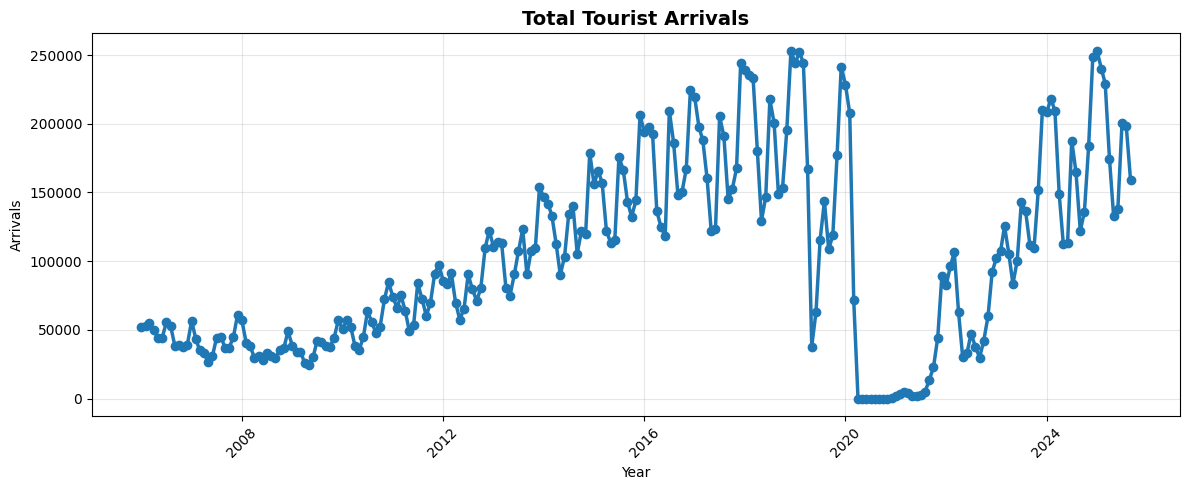

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Total Tourist Arrivals'],
         color='tab:blue', linewidth=2.5, marker='o', markersize=6)
plt.title('Total Tourist Arrivals', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Arrivals')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)  # Prevents overlapping labels
plt.tight_layout()
plt.show()


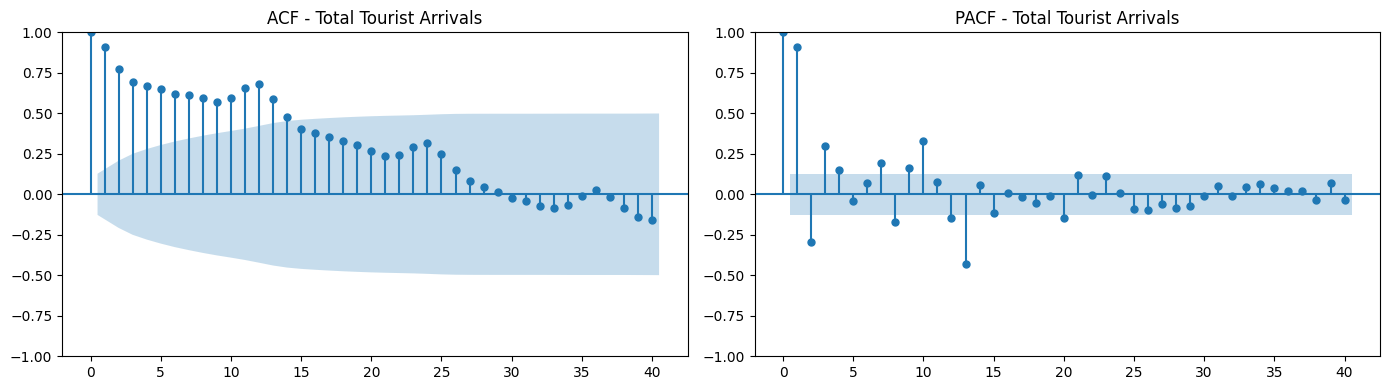

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = df["Total Tourist Arrivals"]

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(series, ax=ax[0], lags=40)
ax[0].set_title("ACF - Total Tourist Arrivals")

plot_pacf(series, ax=ax[1], lags=40, method="ywm")
ax[1].set_title("PACF - Total Tourist Arrivals")

plt.tight_layout()
plt.show()


In [19]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd

series = df["Total Tourist Arrivals"].dropna()

# Augmented Dickey-Fuller Test
adf_result = adfuller(series, autolag="AIC")

adf_output = pd.Series(
    adf_result[0:4],
    index=["ADF Statistic", "p-value", "# Lags Used", "# Observations"]
)

for key, value in adf_result[4].items():
    adf_output[f"Critical Value ({key})"] = value

print("ADF Test Results")
print(adf_output)
print("\n" + "-"*50 + "\n")

# KPSS Test
kpss_result = kpss(series, regression="c", nlags="auto")

kpss_output = pd.Series(
    kpss_result[0:3],
    index=["KPSS Statistic", "p-value", "# Lags Used"]
)

for key, value in kpss_result[3].items():
    kpss_output[f"Critical Value ({key})"] = value

print("KPSS Test Results")
print(kpss_output)


ADF Test Results
ADF Statistic            -1.826065
p-value                   0.367600
# Lags Used              12.000000
# Observations          224.000000
Critical Value (1%)      -3.459885
Critical Value (5%)      -2.874531
Critical Value (10%)     -2.573694
dtype: float64

--------------------------------------------------

KPSS Test Results
KPSS Statistic           0.719609
p-value                  0.011763
# Lags Used              9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [20]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd

series = df["Total Tourist Arrivals"].dropna()

series = np.log10(series+10)
# Augmented Dickey-Fuller Test
adf_result = adfuller(series, autolag="AIC")

adf_output = pd.Series(
    adf_result[0:4],
    index=["ADF Statistic", "p-value", "# Lags Used", "# Observations"]
)

for key, value in adf_result[4].items():
    adf_output[f"Critical Value ({key})"] = value

print("ADF Test Results")
print(adf_output)
print("\n" + "-"*50 + "\n")

# KPSS Test
kpss_result = kpss(series, regression="c", nlags="auto")

kpss_output = pd.Series(
    kpss_result[0:3],
    index=["KPSS Statistic", "p-value", "# Lags Used"]
)

for key, value in kpss_result[3].items():
    kpss_output[f"Critical Value ({key})"] = value

print("KPSS Test Results")
print(kpss_output)

ADF Test Results
ADF Statistic            -3.437646
p-value                   0.009741
# Lags Used              13.000000
# Observations          223.000000
Critical Value (1%)      -3.460019
Critical Value (5%)      -2.874590
Critical Value (10%)     -2.573725
dtype: float64

--------------------------------------------------

KPSS Test Results
KPSS Statistic           0.117965
p-value                  0.100000
# Lags Used              9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/tmp/ipython-input-4270161980.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression="c", nlags="auto")


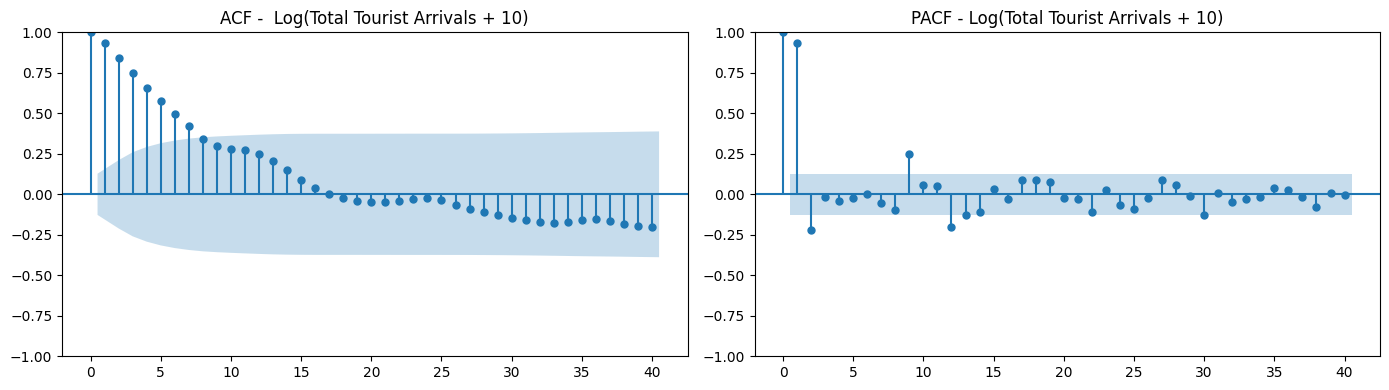

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(series, ax=ax[0], lags=40)
ax[0].set_title("ACF -  Log(Total Tourist Arrivals + 10)")

plot_pacf(series, ax=ax[1], lags=40, method="ywm")
ax[1].set_title("PACF - Log(Total Tourist Arrivals + 10)")

plt.tight_layout()
plt.show()

In [ ]:
series = df["Total Tourist Arrivals"].dropna()

series = np.log10(series+10)

import numpy as np
import statsmodels.api as sm

series = df["Total Tourist Arrivals"].dropna()
series_log = np.log10(series + 10)

# example: ARIMA(1,1,1) on log-transformed series
model = sm.tsa.ARIMA(series_log, order=(1, 1, 1))
result = model.fit()

print(result.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     Total Tourist Arrivals   No. Observations:                  237
Model:                     ARIMA(1, 1, 1)   Log Likelihood                 -46.963
Date:                    Tue, 23 Dec 2025   AIC                             99.927
Time:                            03:50:12   BIC                            110.318
Sample:                        01-01-2006   HQIC                           104.115
                             - 09-01-2025                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0213      0.768      0.028      0.978      -1.484       1.527
ma.L1          0.1620      0.784      0.207      0.836      -1.374       1.698
sigma2         0.087

In [22]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 12.1 MB/s eta 0:00:00


In [23]:
import numpy as np
import pmdarima as pm

series = df["Total Tourist Arrivals"].dropna()
series_log = np.log10(series + 10)

# number of periods in last year
n_test = 12   # use 1 if yearly data

train = series_log.iloc[:-n_test]
test = series_log.iloc[-n_test:]


In [27]:

model = pm.auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=None,
    seasonal=False,        # set True with m=12 if seasonality exists
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    m = 12
)

print(model.summary())



/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1346.837, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=111.590, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=113.575, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=113.580, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=825.099, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=109.219, Time=1.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=116.219, Time=2.59 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.32 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=115.580, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=115.593, Time=0.30 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=116.010, Time=1.37 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=101.317, Time=1.18 s

In [28]:
forecast_log = model.predict(n_periods=n_test)

# invert log transform
forecast = (10 ** forecast_log) - 10
actual = (10 ** test) - 10


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(actual, forecast)
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(actual, forecast)

# MAPE (in percentage)
mape = np.mean(np.abs((actual - forecast) / actual)) * 100

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.2f}%")




MAE  : 110873.54
MSE  : 14131316413.86
RMSE : 118875.21
R²   : -6.8177
MAPE : 55.86%


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd

series = df["Total Tourist Arrivals"].dropna()

series = np.log10(series+10)
# Augmented Dickey-Fuller Test
adf_result = adfuller(series, autolag="AIC")

adf_output = pd.Series(
    adf_result[0:4],
    index=["ADF Statistic", "p-value", "# Lags Used", "# Observations"]
)

for key, value in adf_result[4].items():
    adf_output[f"Critical Value ({key})"] = value

print("ADF Test Results")
print(adf_output)
print("\n" + "-"*50 + "\n")

# KPSS Test
kpss_result = kpss(series, regression="c", nlags="auto")

kpss_output = pd.Series(
    kpss_result[0:3],
    index=["KPSS Statistic", "p-value", "# Lags Used"]
)

for key, value in kpss_result[3].items():
    kpss_output[f"Critical Value ({key})"] = value

print("KPSS Test Results")
print(kpss_output)

ADF Test Results
ADF Statistic            -3.437646
p-value                   0.009741
# Lags Used              13.000000
# Observations          223.000000
Critical Value (1%)      -3.460019
Critical Value (5%)      -2.874590
Critical Value (10%)     -2.573725
dtype: float64

--------------------------------------------------

KPSS Test Results
KPSS Statistic           0.117965
p-value                  0.100000
# Lags Used              9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/tmp/ipython-input-4270161980.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression="c", nlags="auto")


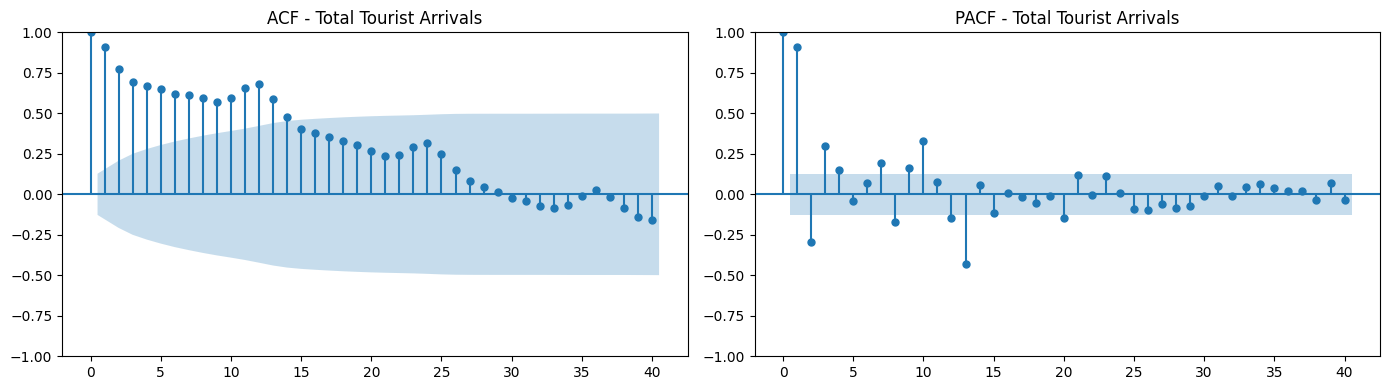

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = df["Total Tourist Arrivals"]

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(series, ax=ax[0], lags=40)
ax[0].set_title("ACF - Total Tourist Arrivals")

plot_pacf(series, ax=ax[1], lags=40, method="ywm")
ax[1].set_title("PACF - Total Tourist Arrivals")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Original series
series = df["Total Tourist Arrivals"].dropna()

# Log transform (offset to avoid log(0))
series_log = np.log10(series + 10)

# Log-differenced series
series_log_diff = series_log.diff().dropna()

adf_result = adfuller(series_log_diff, autolag="AIC")

adf_output = pd.Series(
    adf_result[0:4],
    index=["ADF Statistic", "p-value", "# Lags Used", "# Observations"]
)

for key, value in adf_result[4].items():
    adf_output[f"Critical Value ({key})"] = value

print("ADF Test Results (Log-Differenced Series)")
print(adf_output)
print("\n" + "-"*50 + "\n")

kpss_result = kpss(series_log_diff, regression="c", nlags="auto")

kpss_output = pd.Series(
    kpss_result[0:3],
    index=["KPSS Statistic", "p-value", "# Lags Used"]
)

for key, value in kpss_result[3].items():
    kpss_output[f"Critical Value ({key})"] = value

print("KPSS Test Results (Log-Differenced Series)")
print(kpss_output)


ADF Test Results (Log-Differenced Series)
ADF Statistic            -5.103470
p-value                   0.000014
# Lags Used              10.000000
# Observations          225.000000
Critical Value (1%)      -3.459752
Critical Value (5%)      -2.874473
Critical Value (10%)     -2.573663
dtype: float64

--------------------------------------------------

KPSS Test Results (Log-Differenced Series)
KPSS Statistic           0.027845
p-value                  0.100000
# Lags Used              2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/tmp/ipython-input-2616064753.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_log_diff, regression="c", nlags="auto")


<Axes: xlabel='Date'>

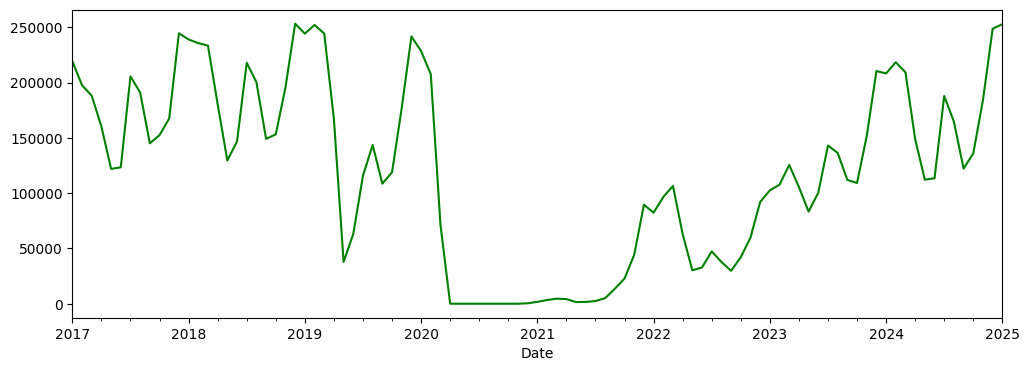

In [ ]:
# Xlimit and ylimit and coloring
df['Total Tourist Arrivals'].plot(xlim=['2017-01-01','2025-01-01'],figsize=(12,4), c='green')

In [ ]:
df.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01'],
              dtype='datetime64[ns]', name='Date', length=238, freq=None)

In [ ]:
# i want to read first 4 rows
df.loc['2017-01-01':'2017-05-01']

,Total Tourist Arrivals
Date,
2017-01-01,219360.0
2017-02-01,197517.0
2017-03-01,188076.0
2017-04-01,160249.0
2017-05-01,121891.0


In [ ]:
index = df.loc['2017-01-01':'2025-05-01'].index
tourism_arrivals = df.loc['2017-01-01':'2025-05-01']['Total Tourist Arrivals']

In [ ]:
index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01',
               ...
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01',
               '2025-04-01', '2025-05-01'],
              dtype='datetime64[ns]', name='Date', length=101, freq=None)

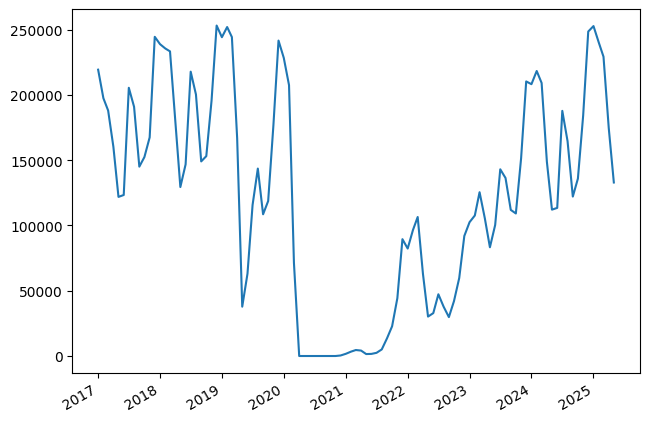

In [ ]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() # preventing overlapping
axis.plot(index, tourism_arrivals)

In [ ]:
df = df.reset_index()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    238 non-null    datetime64[ns]
 1   Total Tourist Arrivals  237 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


In [ ]:
# If Date ==> Object, df['Date'] =pd.to_datetime(df['Date'])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [ ]:
df.head()

,Total Tourist Arrivals
Date,
2006-01-01,52103.0
2006-02-01,52687.0
2006-03-01,54746.0
2006-04-01,49776.0
2006-05-01,43825.0


In [ ]:
date = datetime(2025,6,7)
date

datetime.datetime(2025, 6, 7, 0, 0)

In [ ]:
date.year

2025

In [ ]:
date.month

6

# Time Resampling

In [ ]:
df.head()

,Total Tourist Arrivals
Date,
2006-01-01,52103.0
2006-02-01,52687.0
2006-03-01,54746.0
2006-04-01,49776.0
2006-05-01,43825.0


In [ ]:
df.resample(rule = 'A').min()

C:\Users\The User\AppData\Local\Temp\ipykernel_26540\1790278909.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule = 'A').min()


,Total Tourist Arrivals
Date,
2006-12-31,37591.0
2007-12-31,26307.0
2008-12-31,27960.0
2009-12-31,24739.0
2010-12-31,35213.0
2011-12-31,48943.0
2012-12-31,57506.0
2013-12-31,74838.0
2014-12-31,90046.0


In [ ]:
df.resample(rule = 'A').max()

C:\Users\The User\AppData\Local\Temp\ipykernel_26540\3756504288.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule = 'A').max()


,Total Tourist Arrivals
Date,
2006-12-31,55354.0
2007-12-31,61116.0
2008-12-31,56916.0
2009-12-31,56862.0
2010-12-31,84627.0
2011-12-31,97517.0
2012-12-31,122252.0
2013-12-31,153918.0
2014-12-31,178672.0


C:\Users\The User\AppData\Local\Temp\ipykernel_26540\2042014113.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule = 'A').max()['Total Tourist Arrivals'].plot()


<Axes: xlabel='Date'>

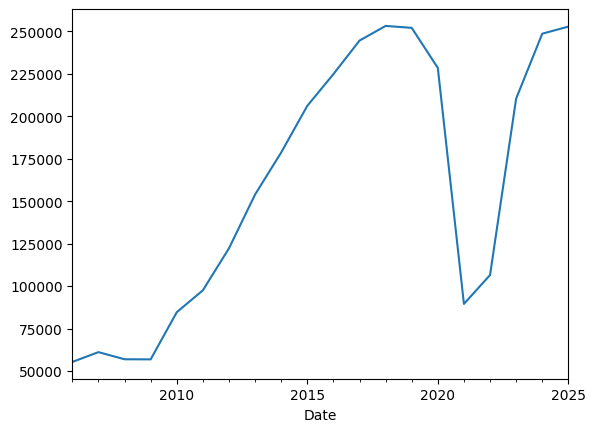

In [ ]:
df.resample(rule = 'A').max()['Total Tourist Arrivals'].plot()

C:\Users\The User\AppData\Local\Temp\ipykernel_26540\3601057354.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule = 'A').max()['Total Tourist Arrivals'].plot(kind='bar')


<Axes: xlabel='Date'>

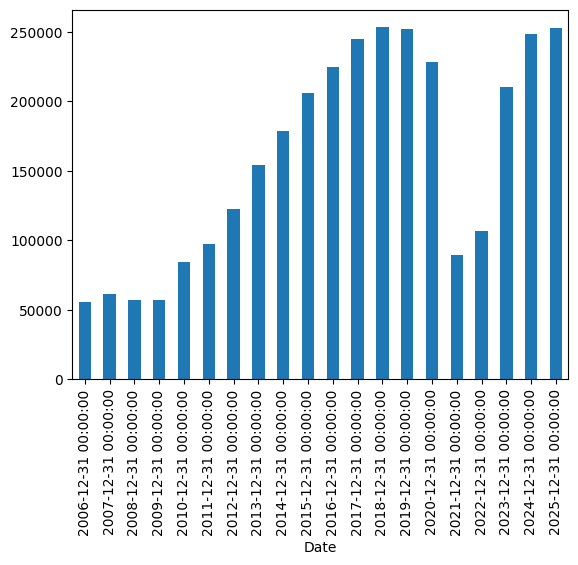

In [ ]:
df.resample(rule = 'A').max()['Total Tourist Arrivals'].plot(kind='bar')

# Rolling

In [ ]:
df['Total Tourist Arrivals'].rolling(10).mean()

Date
2006-01-01         NaN
2006-02-01         NaN
2006-03-01         NaN
2006-04-01         NaN
2006-05-01         NaN
                ...   
2025-06-01    185884.1
2025-07-01    193694.5
2025-08-01    199927.3
2025-09-01    197408.6
2025-10-01         NaN
Name: Total Tourist Arrivals, Length: 238, dtype: float64

In [ ]:
df['Total Tourist Arrivals'].rolling(10).mean().head(20)

Date
2006-01-01        NaN
2006-02-01        NaN
2006-03-01        NaN
2006-04-01        NaN
2006-05-01        NaN
2006-06-01        NaN
2006-07-01        NaN
2006-08-01        NaN
2006-09-01        NaN
2006-10-01    48278.8
2006-11-01    46827.6
2006-12-01    45481.3
2007-01-01    45662.0
2007-02-01    44989.5
2007-03-01    44110.1
2007-04-01    43007.4
2007-05-01    40102.7
2007-06-01    37890.6
2007-07-01    38456.3
2007-08-01    39049.0
Name: Total Tourist Arrivals, dtype: float64

In [ ]:
df['rolling'] = df['Total Tourist Arrivals'].rolling(10).mean()

<Axes: xlabel='Date'>

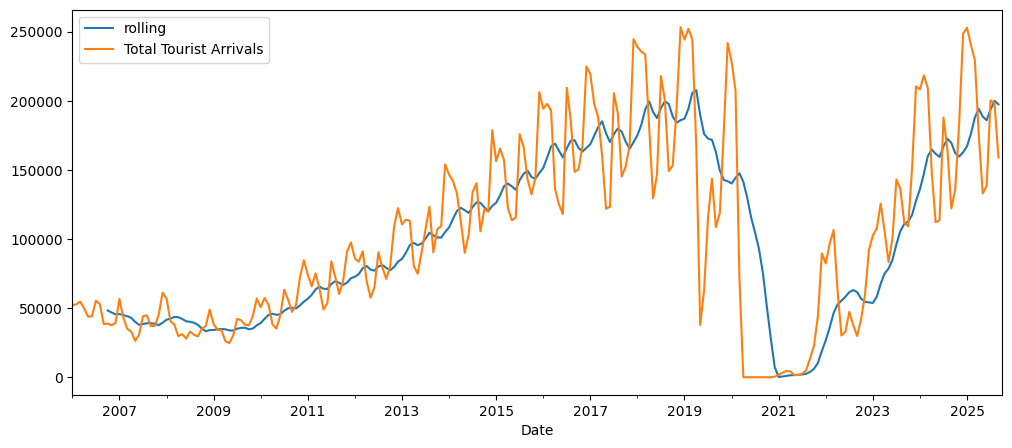

In [ ]:
df[['rolling', 'Total Tourist Arrivals']].plot(figsize=(12,5))

# 2

In [ ]:
# simple moving average


In [ ]:
# EWMA

In [ ]:
## EWMA tesla shares
# Let's smoothing factor - 0.1
df['EMA_0.3'] = df['Total Tourist Arrivals'].ewm(alpha=0.3, adjust=False).mean()

<Axes: xlabel='Date'>

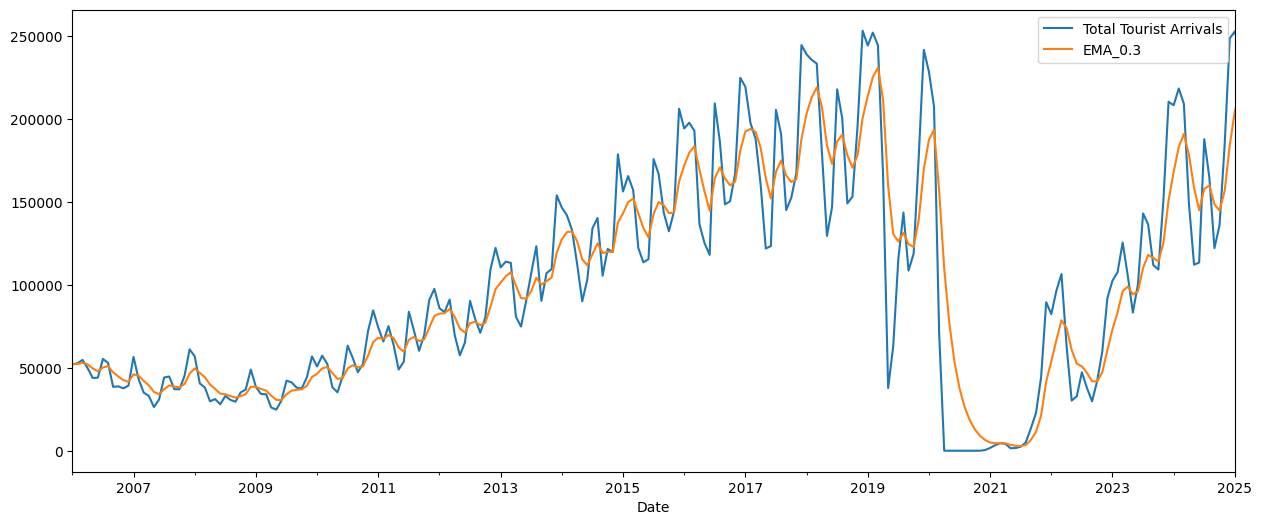

In [ ]:
df[['Total Tourist Arrivals','EMA_0.3']].plot(xlim=['2006-01-01', '2025-01-01'], figsize=(15,6))

In [ ]:
# smoothing increase, smoothing reduce

<Axes: xlabel='Date'>

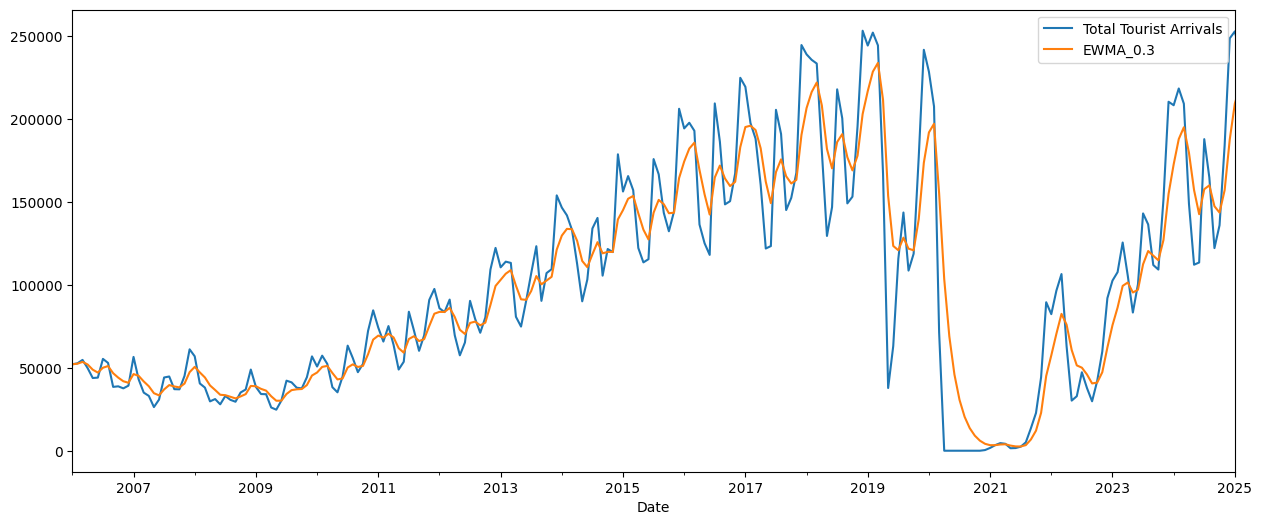

In [ ]:
# EWMA
df['EWMA_0.3'] = df['Total Tourist Arrivals'].ewm(span = 5).mean()
df[['Total Tourist Arrivals','EWMA_0.3']].plot(xlim=['2006-01-01', '2025-01-01'], figsize=(15,6))

# ARIMA

In [ ]:
#df
df.head()

,Total Tourist Arrivals,rolling,EMA_0.1,EMA_0.3,WMA_0.3,EWMA_0.3
Date,,,,,,
2006-01-01,52103.0,NaN,52103.0000,52103.0000,52103.000000,52103.000000
2006-02-01,52687.0,NaN,52161.4000,52278.2000,52453.400000,52453.400000
2006-03-01,54746.0,NaN,52419.8600,53018.5400,53539.368421,53539.368421
2006-04-01,49776.0,NaN,52155.4740,52045.7780,51976.123077,51976.123077
2006-05-01,43825.0,NaN,51322.4266,49579.5446,48847.018957,48847.018957


In [ ]:
 import statsmodels.api as sms

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    results = adfuller(series)
    print('ADF Statistics : {}'.format(results[0]))
    print('p-value : {}'.format(results[1]))
    if results[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis")
    else:
        print("weak evidence against null hypothesis, time series has a unit root")

In [ ]:
adf_test(df['Total Tourist Arrivals'])

ADF Statistics : -1.8260649159039757
p-value : 0.3676001057394751
weak evidence against null hypothesis, time series has a unit root


In [ ]:
# use differencing
df["seasonal_difference"] = df['Total Tourist Arrivals']-df['Total Tourist Arrivals'].shift(12)

In [ ]:
df.head()

,Date,Total Tourist Arrivals,first_difference,seasonal_difference
0,2006-Jan,52103,NaN,NaN
1,2006-Feb,52687,584.0,NaN
2,2006-Mar,54746,2059.0,NaN
3,2006-Apr,49776,-4970.0,NaN
4,2006-May,43825,-5951.0,NaN


In [ ]:
# first difference is stationary

In [ ]:
adf_test(df['seasonal_difference'].dropna())

ADF Statistics : -2.9565667192001226
p-value : 0.03915444876011288
Strong evidence against the null hypothesis, reject the null hypothesis


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

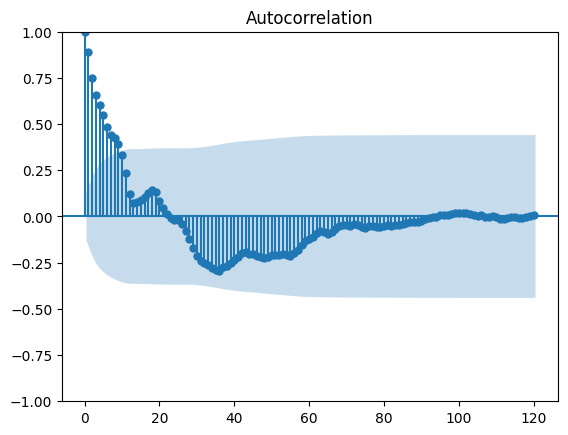

In [ ]:
acf = plot_acf(df['seasonal_difference'].dropna(), lags=120)

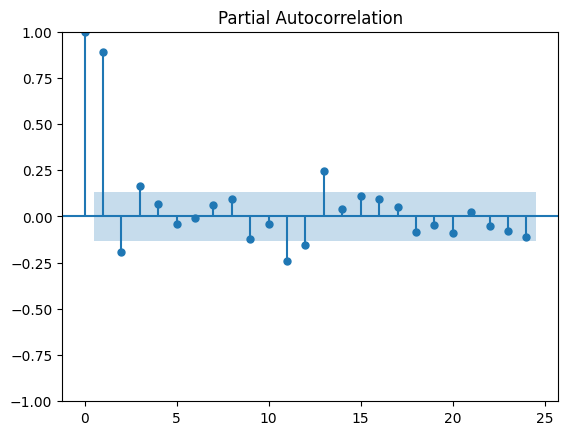

In [ ]:
acf = plot_pacf(df['seasonal_difference'].dropna())

In [ ]:
# ACF plot has each 12 month significant lag
# PACF plot has only 2 significant lags
# It means It has Seasonal AR 2
# https://spureconomics.com/interpreting-acf-and-pacf-plots/

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

# Suppose `df` is your DataFrame with a 'target' column and other feature columns.
# Example data
np.random.seed(42)
time_index = pd.date_range(start='2020-01-01', periods=500, freq='D')
df = pd.DataFrame({
    'time': time_index,
    'target': np.sin(2 * np.pi * np.arange(500) / 50) + np.random.normal(0, 0.1, 500),
    'feature_a': np.random.normal(0, 1, 500),
    'feature_b': np.cos(2 * np.pi * np.arange(500) / 50) + np.random.normal(0, 0.2, 500)
})
df = df.set_index('time')

# 1. Create Lagged Features
lags = 5  # Number of past time steps to use as features
features = ['feature_a', 'feature_b']

for feature in features:
    for lag in range(1, lags + 1):
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# Also create lags for the target itself (autoregressive features)
for lag in range(1, lags + 1):
    df[f'target_lag_{lag}'] = df['target'].shift(lag)

# Drop rows with NaN values created by shifting
df = df.dropna()

# 2. Define Feature Set and Target
X = df.drop('target', axis=1)
y = df['target']

# 3. Calculate Mutual Information
# Discretize continuous variables for estimation. 'n_neighbors' is a key parameter.
mi_scores = mutual_info_regression(X, y, random_state=42, n_neighbors=3)
mi_series = pd.Series(mi_scores, index=X.columns, name="MI Scores")

# 4. Rank and Display Features
mi_series_sorted = mi_series.sort_values(ascending=False)
print(mi_series_sorted)

# 5. Select Top-k Features
top_k = 10
selected_features = mi_series_sorted.head(top_k).index.tolist()
print(f"\nTop {top_k} features: {selected_features}")

# Now you can build a model using only these selected features
X_selected = X[selected_features]

target_lag_1       1.249691
target_lag_2       1.036158
target_lag_3       0.948097
target_lag_4       0.916460
target_lag_5       0.827146
feature_b_lag_5    0.484338
feature_b_lag_3    0.471542
feature_b_lag_4    0.464426
feature_b_lag_2    0.452409
feature_b          0.447930
feature_b_lag_1    0.444321
feature_a          0.039224
feature_a_lag_4    0.006992
feature_a_lag_3    0.004400
feature_a_lag_5    0.000000
feature_a_lag_1    0.000000
feature_a_lag_2    0.000000
Name: MI Scores, dtype: float64

Top 10 features: ['target_lag_1', 'target_lag_2', 'target_lag_3', 'target_lag_4', 'target_lag_5', 'feature_b_lag_5', 'feature_b_lag_3', 'feature_b_lag_4', 'feature_b_lag_2', 'feature_b']
